# Take Ownership work and map back to the original OSE buidlings

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
import re
import geopandas as gp
import urllib.parse
from utils import geo
from utils import owners

In [2]:
df_owners = pd.read_csv("TopLevelOwnership_Downtown.csv")
df_matches = pd.read_csv("all_matches_principals.csv", index_col=[0]).reset_index()
df_parcels = pd.read_csv('../../../experiments/worst_offenders/updated_owners_2_15_23.csv', index_col=[0])

In [3]:
df_owners.head()

,PotentialRelatedCompany,Owner Identified,UBINumber,Owning company Best Guess,HQ City,"Assets, $B, Best Guess",Category,How ownership determined,Ownership status,Building1,Building2,Notes,Number still to do,-1,Number Done,204
0,BPP 999 THIRD AVENUE OWNER LLC,AL,604 467 183,The Blackstone Group,NYC,991.0,Real Estate Investment,"Googling address, looking up govs on Linked In...",Owned,999 3RD AVE,NaN,NaN,NaN,NaN,NaN,NaN
1,BPP 800 FIFTH PROPERTY OWNER LLC,AL,604 371 982,The Blackstone Group,NYC,991.0,Real Estate Investment,"Googling address, looking up govs on Linked In...",Owned,800 5TH AVE,NaN,NaN,NaN,NaN,NaN,NaN
2,BPP 1420 5TH AVE OWNER LLC,AL,604 467 324,The Blackstone Group,NYC,991.0,Real Estate Investment,"Googling address, looking up govs on Linked In...",Owned,1420 5TH AVE,NaN,NaN,NaN,NaN,NaN,NaN
3,"520 PIKE STREET, INC.",AL,602 347 340,Tishman Speyer,NYC,57.0,Real Estate Investment,"Googling address found company HQ, then googli...",Owned,520 PIKE ST,NaN,NaN,NaN,NaN,NaN,NaN
4,"ONNI 1411 FOURTH DEVELOPMENT, INC.",AL,603 587 072,Onni Group,Vancouver BC,5.0,Real Estate Development and Managment,"Google address found co HQ, then google gov na...",Owned,1411 4TH AVE,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_matches.head()

,Unnamed: 0,SearchTerm,BusinessName,UBINumber,BusinessId,Address,Status,address_match,ubi_match,id_match,isMatch,Agent,EntityType,PrincipalID,PrincipalName
0,0,KAR STANDARD LLC,KAR STANDARD LLC,604 145 518,763141,"1 FEDERAL ST FL 17, BOSTON, MA, 02110-2003, UN...",Active,False,False,False,1.0,CORPORATION SERVICE COMPANY,Entity,1570323.0,KAONOULU RANCH LLLP
1,1,300 FIFTH AVENUE LLC,300 FIFTH AVENUE LLC,604 670 512,1399595,"1000 2ND AVE STE 1800, SEATTLE, WA, 98104-3619...",Active,False,False,False,1.0,NaN,Individual,3315049.0,JOHN M. GREELEY
2,1,300 FIFTH AVENUE LLC,300 FIFTH AVENUE LLC,604 670 512,1399595,"1000 2ND AVE STE 1800, SEATTLE, WA, 98104-3619...",Active,False,False,False,1.0,NaN,Individual,3349317.0,MARTIN SELIG
3,2,MSI - 1ST & KING LLC,MSI - 1ST & KING LLC,602 739 680,880019,"316 OCCIDENTAL AVE S, STE 300, SEATTLE, WA, 98...",Active,False,False,False,1.0,FIKSO KRETSCHMER SMITH DIXON ORMSETH PS,Individual,2114613.0,"H MARTIN SMITH, III"
4,3,BRICKMAN PACIFIC LLC,BRICKMAN PACIFIC LLC,603 445 367,74763,"C/O BRICKMAN, ONCE GREENWICH OFFICE PARK, BUIL...",Active,False,False,False,1.0,C T CORPORATION SYSTEM,Entity,3617104.0,BRICKMAN FUND VI REIT INC.


In [5]:
df_parcels.head()

,OSEBuildingID,TaxParcelIdentificationNumber,DataYear,BuildingType,BuildingName,Owner,CouncilDistrictCode,Neighborhood,Units,YearBuilt,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Outlier,ComplianceIssue,ComplianceStatus,Comments,DefaultData,LegislationPropertyType,Dept
0,50148,7733600135,2020,NonResidential,RESIDENCE INN SEATTLE U,TMUD GSL LLC,4.0,NORTHEAST,NaN,2016,...,54695.0,NaN,NaN,NaN,No Issue,Compliant,NaN,NaN,Hotel,NaN
1,50150,1991200090,2020,NonResidential,HYATT HOUSE,HH SEATTLE LLC,1.0,LAKE UNION,NaN,2016,...,28069.0,NaN,NaN,NaN,No Issue,Compliant,NaN,NaN,Hotel,NaN
2,50160,659000775,2020,NonResidential,AMAZON DOPPLER BUILDING,ACORN DEVELOPMENT LLC,7.0,DOWNTOWN,NaN,2016,...,448625.0,Convention Center,59672.0,NaN,No Issue,Compliant,NaN,NaN,Office,NaN
3,50166,4083306985,2020,NonResidential,TABLEAU (NORTH EDGE),BRE-BMR 34TH LLC,1.0,LAKE UNION,NaN,2016,...,117684.0,Restaurant,2839.0,NaN,No Issue,Compliant,NaN,NaN,Office,NaN
4,50192,660001605,2020,NonResidential,MIDTOWN 21 (AMAZON),MIDTOWN21 LLC,1.0,DOWNTOWN,NaN,2016,...,110813.0,NaN,NaN,NaN,No Issue,Compliant,NaN,NaN,Office,NaN


In [6]:
def index_wrapper(fun):
    try:
        return fun()
    except IndexError:
        return None

In [8]:
owner_to_ubi = lambda owner: df_owners[df_owners["Owning company Best Guess"]==owner]["UBINumber"].unique()
ubi_to_search_term = lambda ubi: df_matches[df_matches["UBINumber"]==ubi]["SearchTerm"].unique()
search_term_to_ose_id = lambda search_term: df_parcels[df_parcels["Owner"]==search_term]["OSEBuildingID"].unique()

In [9]:
ose_id_to_search_term = lambda ose_id: df_parcels[df_parcels["OSEBuildingID"]==ose_id]["Owner"].values[0]
search_term_to_ubi = lambda search_term : df_matches[df_matches["SearchTerm"]==search_term]["UBINumber"].values[0] if (search_term != "UNDEFINED" and search_term != "NOT FOUND") else None
ubi_to_owner = lambda ubi: df_owners[df_owners["UBINumber"]==ubi]["Owning company Best Guess"].values[0]

In [10]:
index_wrapper(lambda : search_term_to_ubi("BPP 999 THIRD AVENUE OWNER LLC"))

'604 467 183'

In [11]:
owner_to_ubi("The Blackstone Group")

array(['604 467 183', '604 371 982', '604 467 324'], dtype=object)

In [12]:
ubi_to_search_term("604 467 183")

array(['BPP 999 THIRD AVENUE OWNER LLC'], dtype=object)

In [13]:
search_term_to_ose_id("BPP 999 THIRD AVENUE OWNER LLC")

array([345], dtype=int64)

In [14]:
df_parcels[df_parcels["OSEBuildingID"]==345]

,OSEBuildingID,TaxParcelIdentificationNumber,DataYear,BuildingType,BuildingName,Owner,CouncilDistrictCode,Neighborhood,Units,YearBuilt,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Outlier,ComplianceIssue,ComplianceStatus,Comments,DefaultData,LegislationPropertyType,Dept
667,345,939000435,2020,NonResidential,999 THIRD AVE,BPP 999 THIRD AVENUE OWNER LLC,1.0,DOWNTOWN,NOT_FOUND,1983,...,272682.0,NaN,NaN,NaN,No Issue,Compliant,NaN,NaN,Office,NaN


In [15]:
ose_id_to_search_term(345)

'BPP 999 THIRD AVENUE OWNER LLC'

In [16]:
search_term_to_ubi('BPP 999 THIRD AVENUE OWNER LLC')

'604 467 183'

In [17]:
ubi_to_owner('604 467 183')

'The Blackstone Group'

In [18]:
df_districts = gp.read_file("../../../data/Council_Districts.geojson")
df = pd.read_csv('../../../data/2020_Building_Energy_Benchmarking.csv')
df = gp.GeoDataFrame(df, geometry=gp.points_from_xy(df.Longitude, df.Latitude))
geo.clean_districts(df, df_districts)
df_downtown=df.loc[df['Neighborhood']=="DOWNTOWN"]

Building WATERWORKS OFFICE & MARINA 2353/ 4088803975 doesn't have a district POINT (-122.33895 47.63575) 
	 Found district 7 for WATERWORKS OFFICE & MARINA
Building NAUTICAL LANDING 2381/ 4088804350 doesn't have a district POINT (-122.34219 47.64306) 
	 Found district 7 for NAUTICAL LANDING
Building UNION HARBOR CONDOMINIUM 2540/ 8807200000 doesn't have a district POINT (-122.33003 47.6401) 
	 Found district 4 for UNION HARBOR CONDOMINIUM
Building THE PIER AT LESCHI 2997/ 6780900000 doesn't have a district POINT (-122.28563 47.59926) 
	 Found district 3 for THE PIER AT LESCHI
Building THE LAKESHORE 3046/ 1180001715 doesn't have a district POINT EMPTY 
Building EDUCARE 3218/ 2895800030 doesn't have a district POINT EMPTY 


In [19]:
df_downtown.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,geometry
0,1,2020,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101.0,47.61220,...,801392,1457837,6326,Compliant,No Issue,2734351.0,632586.0,169.1,1.9,POINT (-122.33799 47.61220)
1,2,2020,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101.0,47.61317,...,568667,0,16614,Compliant,No Issue,1940292.0,1661402.0,98.6,1.1,POINT (-122.33393 47.61317)
2,3,2020,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,...,7478716,10359896,8955,Compliant,No Issue,25517379.0,895500.0,1043.2,1.4,POINT (-122.33822 47.61367)
3,5,2020,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101.0,47.61412,...,345231,917724,8871,Compliant,No Issue,1177927.0,887059.0,129.6,2.1,POINT (-122.33664 47.61412)
4,8,2020,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,...,1102452,0,46034,Compliant,No Issue,3761566.0,4603411.0,264.5,2.3,POINT (-122.34047 47.61375)


In [20]:
df_parcels["Owner"].value_counts()

UNDEFINED                        939
CITY OF SEATTLE                  175
NOT FOUND                         50
UNIVERSITY OF WASHINGTON          43
STATE OF WASHINGTON               17
                                ... 
HF 5111 PROPERTY LLC               1
BALLARD SPACE LLC                  1
WORKSHOPS SEATTLE BALLARD LLC      1
TRINITY PROPERTIES INC             1
JK COMMERCIAL PROPERTIES LLC       1
Name: Owner, Length: 2080, dtype: int64

In [21]:
def get_row_owner(row):
    extra_search_terms = []
    # print(row)
    row_ose_id = row["OSEBuildingID"]
    row_search_term = ose_id_to_search_term(row_ose_id)
    print(row_search_term)
    try:
        row_ubi = search_term_to_ubi(row_search_term)
    except IndexError:
        row_parcel_owner = df_parcels[df_parcels["OSEBuildingID"]==row_ose_id]["Owner"].values[0]
        print(f"A. OSE Building {row_ose_id} owner {row_search_term} not in prinicipals list!")
        print(f"\t Parcel Owner: {row_parcel_owner}")
        if row_parcel_owner != "UNDEFINED" or row_parcel_owner != "NOT FOUND":
            extra_search_terms += [row_search_term]
        return ""
    try:
        row_owner = ubi_to_owner(row_ubi)
    except IndexError:
        print(f"B. OSE Building {row_ose_id} owner {row_search_term} ubi {row_ubi} not in owners!")
        return ""
    return row_owner

df_downtown["Owner"] = df_downtown.apply(lambda row: get_row_owner(row),axis=1)


ASPEN FLOWER LLC+MAYFLOWER HOTEL OWNER LLC
A. OSE Building 1 owner ASPEN FLOWER LLC+MAYFLOWER HOTEL OWNER LLC not in prinicipals list!
	 Parcel Owner: ASPEN FLOWER LLC+MAYFLOWER HOTEL OWNER LLC
8TH & PINE JOINT VENTURE
B. OSE Building 2 owner 8TH & PINE JOINT VENTURE ubi 603 459 107 not in owners!
SEATTLE HOST HOTEL COMPANY L L C
B. OSE Building 3 owner SEATTLE HOST HOTEL COMPANY L L C ubi 602 658 705 not in owners!
VANCE HOTEL ASSOCIATES LIMITED PARTNERSHIP
B. OSE Building 5 owner VANCE HOTEL ASSOCIATES LIMITED PARTNERSHIP ubi 602 678 924 not in owners!
UNDEFINED
B. OSE Building 8 owner UNDEFINED ubi None not in owners!
CITY OF SEATTLE
A. OSE Building 9 owner CITY OF SEATTLE not in prinicipals list!
	 Parcel Owner: CITY OF SEATTLE
WORLDMARK THE CLUB
B. OSE Building 10 owner WORLDMARK THE CLUB ubi 601 203 364 not in owners!
SCD 2U LLC
618 SECOND AVENUE LIMITED PS+GOLDEN RAINBOW FREEDOM FUND LIMITED PS ET AL
A. OSE Building 12 owner 618 SECOND AVENUE LIMITED PS+GOLDEN RAINBOW FREEDOM FU

c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [23]:
ubi = search_term_to_ubi("8TH & PINE JOINT VENTURE")
ubi_to_owner(ubi)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [24]:
df_downtown.Owner.value_counts()

                            388
Martin Selig Real Estate     11
Unico                         8
Bellwether Housing            6
Martin Smith, Inc             6
                           ... 
STRS Ohio                     1
Goldman Sachs                 1
Vulcan Real Estate            1
Kimco Realty                  1
Woo Family                    1
Name: Owner, Length: 142, dtype: int64

In [22]:
df_parcels.Owner.value_counts()

UNDEFINED                        939
CITY OF SEATTLE                  175
NOT FOUND                         50
UNIVERSITY OF WASHINGTON          43
STATE OF WASHINGTON               17
                                ... 
HF 5111 PROPERTY LLC               1
BALLARD SPACE LLC                  1
WORKSHOPS SEATTLE BALLARD LLC      1
TRINITY PROPERTIES INC             1
JK COMMERCIAL PROPERTIES LLC       1
Name: Owner, Length: 2080, dtype: int64

In [25]:
extra_search_terms = np.array([])
extra_ubi = np.array([])
for idx, row in df_downtown.iterrows():
    row_ose_id = row["OSEBuildingID"]
    row_parcel_owner = df_parcels[df_parcels["OSEBuildingID"]==row_ose_id]["Owner"].values[0]
    if row["Owner"] == "":
        if (row_parcel_owner != "UNDEFINED" and row_parcel_owner != "NOT FOUND"):
            # print(row_parcel_owner)
            # extra_search_terms += np.array([row_parcel_owner])
            try:
                row_ubi = search_term_to_ubi(row_parcel_owner)
                extra_ubi = np.append(extra_ubi, row_ubi)
                print(row_ubi)
            except IndexError:
                print(row_parcel_owner)
                extra_search_terms = np.append(extra_search_terms, row_parcel_owner)


ASPEN FLOWER LLC+MAYFLOWER HOTEL OWNER LLC
603 459 107
602 658 705
602 678 924
CITY OF SEATTLE
601 203 364
618 SECOND AVENUE LIMITED PS+GOLDEN RAINBOW FREEDOM FUND LIMITED PS ET AL
SUPERNOVA SEATTLE REALTY LLC
601 877 875
604 921 988
MILLENIUM TOWER LLC
KING COUNTY
603 579 184
ARRENDELL AMY+ARRENDELL REVOCABLE LIVING TRUST AMY +ET AL
602 511 823
MILLENIUM TOWER LLC
603 440 553
600 583 233
602 735 324
SWEAZEY INVESTMENTS L L C
700 OLIVE LP  % CLISE PROPERTIES
ASHFORD SEATTLE WATERFRONT L P
PIERS 55 & 56 LLC
ESSEX PORTFOLIO L P
603 176 819
700 OLIVE LP  % CLISE PROPERTIES
604 535 085
601 893 911
KILROY REALTY L P
604 678 268
CHILDREN'S HOSPITAL & REGIONAL MEDICAL CENTER
BPP EXCHANGE BUILDING PROPERY OWNER LLC
US VI SENECA OFFICE LLC +NORTHWOOD INVESTORS LLC
US VI SENECA TOWER LLC +NORTHWOOD INVESTORS LLC
601 338 627
CITY OF SEATTLE
KING COUNTY
KING COUNTY
603 393 469
HUDSON 5TH + BELL LLC
FIFTH & WALL L L C
WESTERN OFFICE PORTFOLIO PROPERTY OWNER LLC +UNICO PROPERTIES LLC
UNIVERSITY OF W

In [26]:
len(set(extra_search_terms))

167

In [27]:
len(set(extra_ubi))

35

In [28]:
extra_ubi

array(['603 459 107', '602 658 705', '602 678 924', '601 203 364',
       '601 877 875', '604 921 988', '603 579 184', '602 511 823',
       '603 440 553', '600 583 233', '602 735 324', '603 176 819',
       '604 535 085', '601 893 911', '604 678 268', '601 338 627',
       '603 393 469', '603 244 928', '602 259 240', '604 186 121',
       '603 425 160', '602 570 885', '603 497 884', '178 019 356',
       '603 545 500', '604 667 947', '603 468 238', '604 535 085',
       '603 558 821', '603 450 846', '603 220 361', '604 987 469',
       '602 355 440', '604 953 695', '604 373 748', '604 032 015'],
      dtype='<U32')

In [29]:
df_extra = df_matches[df_matches["UBINumber"].isin(extra_ubi)]

In [30]:
group_helper = owners.GroupCompaniesHelper(os.getcwd(), "\extra_downtown_comapnies_and_matches.csv")

In [31]:
companies_and_matches = group_helper.group_companies_by_principals(df_extra)

Saving to c:\Users\linne\Documents\BPS\experiments\landlords\parent_company_search\extra_downtown_comapnies_and_matches.csv
Processing row 250 of principal_match_list, results is 2
Processing row 750 of principal_match_list, results is 21


In [32]:
len(companies_and_matches)

30

In [33]:
df_large = df_downtown[df_downtown["PropertyGFABuilding(s)"]> 100000]

In [34]:
df_large["Owner"].value_counts()

                                     158
Martin Selig Real Estate               9
Unico                                  6
Hudson Pacific Properties              5
The Blackstone Group                   3
                                    ... 
Skanska Commercial Development         1
STRS Ohio                              1
Stanley Real Estate                    1
AFL-CIO Building Investment Trust      1
PGIM                                   1
Name: Owner, Length: 69, dtype: int64

In [35]:
len(df_large)

260

- TaxParcelOwner = correlates to tax parcel id. Equiavlent to "SearchTerm" in the first version of output
- Owner = top-level owner
- Business = when looking up TaxParcelOwner in CCFS database, this is the result we get

In [46]:
keep = ["OSEBuildingID", "BuildingName", "Address", "PropertyGFABuilding(s)", "TaxParcelIdentificationNumber", "Owner"]
df_large = df_large[keep]
df_large.head()

In [49]:
df_large.to_csv("downtown_large.csv")

In [36]:
df_large["TaxParcelOwner"] = df_large.apply(lambda row: ose_id_to_search_term(row["OSEBuildingID"]),axis=1)


c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [37]:
df_large["UBINumber"] = df_large.apply(lambda row: index_wrapper(lambda : search_term_to_ubi(row["TaxParcelOwner"])), axis=1)

c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [38]:
df_large.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,geometry,Owner,TaxParcelOwner,UBINumber
2,3,2020,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,...,Compliant,No Issue,25517379.0,895500.0,1043.2,1.4,POINT (-122.33822 47.61367),,SEATTLE HOST HOTEL COMPANY L L C,602 658 705
4,8,2020,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,...,Compliant,No Issue,3761566.0,4603411.0,264.5,2.3,POINT (-122.34047 47.61375),,UNDEFINED,None
7,11,2020,PARAMOUNT THEATER,NonResidential,0660000955,901 PINE ST,SEATTLE,WA,98101.0,47.61327,...,Compliant,No Issue,2613508.0,423281.0,215.2,2.1,POINT (-122.33136 47.61327),Skanska Commercial Development,SCD 2U LLC,603 490 488
8,12,2020,COURTYARD BY MARRIOTT - PIONEER SQ,NonResidential,0939000080,612 2ND AVE,SEATTLE,WA,98104.0,47.60294,...,Compliant,No Issue,4721618.0,5351700.0,309.3,1.9,POINT (-122.33263 47.60294),,618 SECOND AVENUE LIMITED PS+GOLDEN RAINBOW FR...,None
10,15,2020,HOTEL MONACO,NonResidential,0942000145,1101 4TH AVE,SEATTLE,WA,98101.0,47.60695,...,Compliant,No Issue,6389956.0,4139200.0,476.8,3.6,POINT (-122.33414 47.60695),Pebblebrook Hotel Trust,RUNNING REBELS OWNER LLC,603 099 961


In [39]:
sum(df_large["UBINumber"].isna())

140

In [40]:
# A mix of UBINmber==NA when no tax parcel owner, but also some known owners. 
# Why don't we have a UBI number when we have a tax parcel owner? 
# TODO: go through and see if we can find governor data for the cases above? 
df_large[df_large["UBINumber"].isna()].head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,geometry,Owner,TaxParcelOwner,UBINumber
4,8,2020,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,...,Compliant,No Issue,3761566.0,4603411.0,264.5,2.3,POINT (-122.34047 47.61375),,UNDEFINED,None
8,12,2020,COURTYARD BY MARRIOTT - PIONEER SQ,NonResidential,0939000080,612 2ND AVE,SEATTLE,WA,98104.0,47.60294,...,Compliant,No Issue,4721618.0,5351700.0,309.3,1.9,POINT (-122.33263 47.60294),,618 SECOND AVENUE LIMITED PS+GOLDEN RAINBOW FR...,None
11,16,2020,W SEATTLE HOTEL,NonResidential,0942000165,1112 4TH AVE,SEATTLE,WA,98101.0,47.60738,...,Compliant,No Issue,12014553.0,1299900.0,291.0,1.1,POINT (-122.33362 47.60738),,SUPERNOVA SEATTLE REALTY LLC,None
15,21,2020,SEATTLE CENTRAL LIBRARY,Nonresidential COS,0942000275,1000 4TH AVE,SEATTLE,WA,98104.0,47.60649,...,Compliant,No Issue,14439239.0,0.0,105.9,0.3,POINT (-122.33297 47.60649),,UNDEFINED,None
16,22,2020,DOWNTOWN SEATTLE YMCA,NonResidential,0942000350,909 4TH AVE,SEATTLE,WA,98104.0,47.60546,...,Compliant,No Issue,4266249.0,224310.0,341.7,3.3,POINT (-122.33279 47.60546),,MILLENIUM TOWER LLC,None


In [41]:
# Need to add company address and principals from all_matches_principals

In [42]:
principals = df_matches[df_matches["UBINumber"] == "602 658 705"].PrincipalName.values
principals.sort()

In [43]:
principals

array([' BENJAMIN FRANKLIN HOTEL, INC', ' W & S REALTY CORPORATION OF DE',
       'GREGORY LARSON', 'JOSEPH C. OTTINGER', 'MICHAEL L. ROCK',
       'NATHAN S. TYRRELL'], dtype=object)

In [44]:
def ubi_to_principals(row):
    if row["UBINumber"] == None:
        return None
    principals = df_matches[df_matches["UBINumber"]==row["UBINumber"]]["PrincipalName"].values
    principals.sort()
    return principals

def ubi_to_company_address(row):
    if row["UBINumber"] == None:
        return None
    address = df_matches[df_matches["UBINumber"]==row["UBINumber"]]["Address"].values[0]
    return address

def ubi_to_business_name(row):
    if row["UBINumber"] == None:
        return None
    business_name = df_matches[df_matches["UBINumber"]==row["UBINumber"]]["BusinessName"].values[0]
    return business_name

def ubi_to_agent(row):
    if row["UBINumber"] == None:
        return None
    agent = df_matches[df_matches["UBINumber"]==row["UBINumber"]]["Agent"].values[0]
    return agent

In [45]:
df_large["Principals"] = df_large.apply(lambda row: ubi_to_principals(row), axis=1)
df_large["CompanyAddress"] = df_large.apply(lambda row: ubi_to_company_address(row), axis=1)
df_large["BusinessName"] = df_large.apply(lambda row: ubi_to_business_name(row), axis=1)
df_large["Agent"] = df_large.apply(lambda row: ubi_to_agent(row), axis=1)

c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [46]:
df_large.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,TotalGHGEmissions,GHGEmissionsIntensity,geometry,Owner,TaxParcelOwner,UBINumber,Principals,CompanyAddress,BusinessName,Agent
2,3,2020,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,...,1043.2,1.4,POINT (-122.33822 47.61367),,SEATTLE HOST HOTEL COMPANY L L C,602 658 705,"[ BENJAMIN FRANKLIN HOTEL, INC, W & S REALTY ...","4747 BETHESDA AVENUE, SUITE 1300, BETHESDA, MD...",SEATTLE HOST HOTEL COMPANY LLC,CORPORATION SERVICE COMPANY
4,8,2020,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,...,264.5,2.3,POINT (-122.34047 47.61375),,UNDEFINED,None,None,None,None,None
7,11,2020,PARAMOUNT THEATER,NonResidential,0660000955,901 PINE ST,SEATTLE,WA,98101.0,47.61327,...,215.2,2.1,POINT (-122.33136 47.61327),Skanska Commercial Development,SCD 2U LLC,603 490 488,[CLAES LARSSON],"389 INTERPACE PKWY, 5TH FLOOR, PARSIPPANY, NJ,...",SCD 2U LLC,CORPORATION SERVICE COMPANY
8,12,2020,COURTYARD BY MARRIOTT - PIONEER SQ,NonResidential,0939000080,612 2ND AVE,SEATTLE,WA,98104.0,47.60294,...,309.3,1.9,POINT (-122.33263 47.60294),,618 SECOND AVENUE LIMITED PS+GOLDEN RAINBOW FR...,None,None,None,None,None
10,15,2020,HOTEL MONACO,NonResidential,0942000145,1101 4TH AVE,SEATTLE,WA,98101.0,47.60695,...,476.8,3.6,POINT (-122.33414 47.60695),Pebblebrook Hotel Trust,RUNNING REBELS OWNER LLC,603 099 961,"[PEBBLEBROOK HOTEL, L.P.]","4747 BETHESDA AVENUE, SUITE 1100, BETHESDA, MD...",RUNNING REBELS OWNER LLC,C T CORPORATION SYSTEM


In [47]:
df_large.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'geometry', 'Owner', 'TaxParcelOwner',

In [168]:
cols = ["BusinessName", "CompanyAddress", "Owner","Principals","BuildingName","Address","PropertyGFABuilding(s)", "Agent", "UBINumber", "TaxParcelOwner"]

In [169]:
df_large = df_large[cols]

In [172]:
df_large.to_csv("downtown_large.csv")

In [49]:
df_downtown["TaxParcelOwner"] = df_downtown.apply(lambda row: ose_id_to_search_term(row["OSEBuildingID"]),axis=1)
df_downtown["UBINumber"] = df_downtown.apply(lambda row: index_wrapper(lambda : search_term_to_ubi(row["TaxParcelOwner"])), axis=1)

c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [50]:
df_downtown["Principals"] = df_downtown.apply(lambda row: ubi_to_principals(row), axis=1)
df_downtown["CompanyAddress"] = df_downtown.apply(lambda row: ubi_to_company_address(row), axis=1)
df_downtown["BusinessName"] = df_downtown.apply(lambda row: ubi_to_business_name(row), axis=1)
df_downtown["Agent"] = df_downtown.apply(lambda row: ubi_to_agent(row), axis=1)

c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\linne\miniconda3\envs\bps\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [52]:
len(df_downtown)

608

In [74]:
df_downtown_owned = df_downtown[df_downtown["Owner"] != ""]
df_downtown_unowned = df_downtown[df_downtown["Owner"] == ""]

In [75]:
len(df_downtown_owned) + len(df_downtown_unowned)

608

In [92]:
print(f"% of downtown with owners identified: {len(df_downtown_owned) / len(df_downtown)*100}")
print("% of total square footage: ", df_downtown_owned["PropertyGFABuilding(s)"].sum() / df_downtown["PropertyGFABuilding(s)"].sum()*100)
print("% of total emissions: ", df_downtown_owned["TotalGHGEmissions"].sum() / df_downtown["TotalGHGEmissions"].sum()*100)

% of downtown with owners identified: 36.18421052631579
% of total square footage:  42.44063735937272
% of total emissions:  31.21409568929334


(array([157.,  27.,  17.,   5.,   3.,   3.,   5.,   1.,   1.,   1.]),
 array([  20028. ,  181307.2,  342586.4,  503865.6,  665144.8,  826424. ,
         987703.2, 1148982.4, 1310261.6, 1471540.8, 1632820. ]),
 <BarContainer object of 10 artists>)

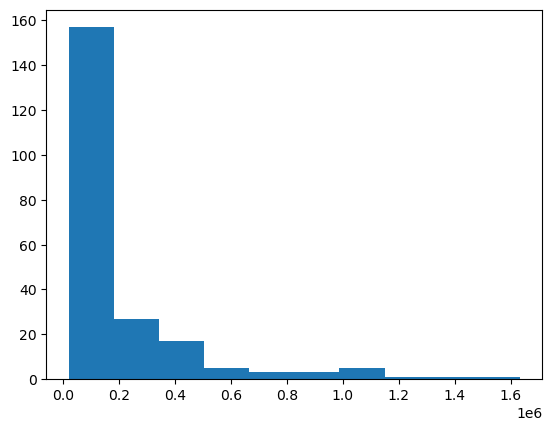

In [90]:
plt.hist(df_downtown_owned["PropertyGFABuilding(s)"])

In [91]:
df_downtown.to_csv("downtown_ose_owner.csv")

## Looking at breakdown of large buildings in Seattle

In [198]:
df_downtown = pd.DataFrame(df_downtown.drop(columns="geometry"))

In [199]:
df_large = df_downtown[df_downtown["PropertyGFABuilding(s)"] > 100000]
sum(df_large["PropertyGFABuilding(s)"]) / sum(df_downtown["PropertyGFABuilding(s)"])

0.8323697240043255

In [200]:
df_large["TotalGHGEmissions"].sum() / df_downtown.TotalGHGEmissions.sum()

0.7868078257647039

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([445.,  90.,  32.,  15.,   8.,   5.,   8.,   3.,   1.,   1.]),
 array([  20028. ,  181307.2,  342586.4,  503865.6,  665144.8,  826424. ,
         987703.2, 1148982.4, 1310261.6, 1471540.8, 1632820. ]),
 <BarContainer object of 10 artists>)

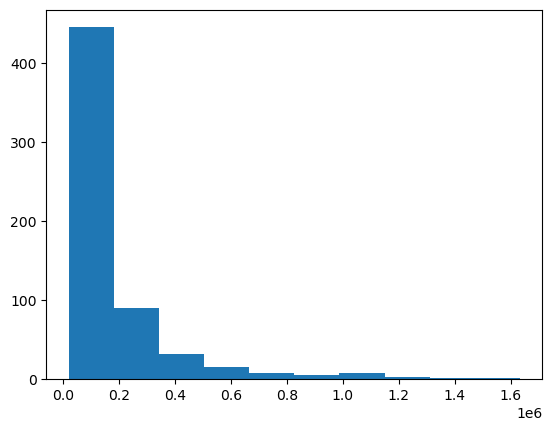

In [202]:
plt.hist(df_downtown["PropertyGFABuilding(s)"])

In [217]:
df_downtown["SizeGroups"] = pd.qcut(df_downtown["PropertyGFABuilding(s)"], 4, precision=1)

Text(0, 0.5, 'Total Emissions')

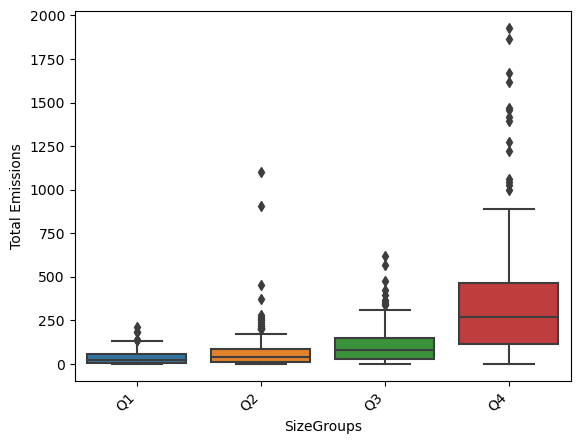

In [221]:
#chart = sns.boxplot(x='EPAPropertyType', y='GHGEmissionsIntensity', data=df[df['GHGEmissionsIntensity']> intensities.quantile(0.9)].sort_values('GHGEmissionsIntensity'))
chart = sns.boxplot(x=df_downtown['SizeGroups'], y=df_downtown['TotalGHGEmissions'])
x_labels = ["Q1", "Q2", "Q3", "Q4"]
chart.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
chart.set_ylabel("Total Emissions")

Text(0, 0.5, 'Total Emissions')

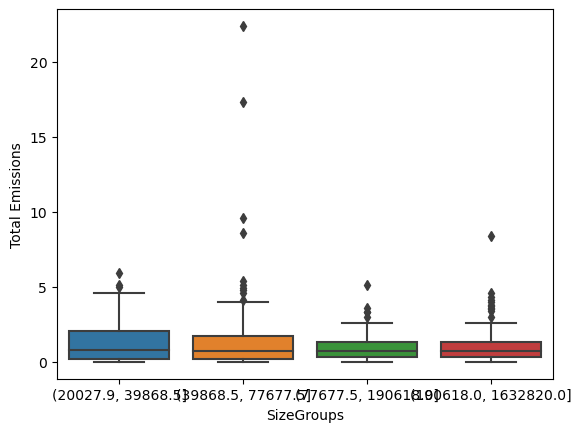

In [230]:
chart = sns.boxplot(x=df_downtown['SizeGroups'], y=df_downtown['GHGEmissionsIntensity'])
# x_labels = ["Q1", "Q2", "Q3", "Q4"]
# chart.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
chart.set_ylabel("Total Emissions")

[(77677.5, 190618.0], (190618.0, 1632820.0], (39868.5, 77677.5], (20027.999, 39868.5]]
Categories (4, interval[float64, right]): [(20027.999, 39868.5] < (39868.5, 77677.5] < (77677.5, 190618.0] < (190618.0, 1632820.0]]

In [224]:
df_downtown.groupby("SizeGroups")["TotalGHGEmissions"].describe()

,count,mean,std,min,25%,50%,75%,max
SizeGroups,,,,,,,,
"(20027.9, 39868.5]",150.0,37.608667,40.732727,0.0,6.200,24.0,57.575,213.5
"(39868.5, 77677.5]",152.0,79.273684,132.046300,0.0,14.375,39.0,87.675,1103.0
"(77677.5, 190618.0]",151.0,116.324503,112.989552,0.0,29.700,83.1,148.400,621.6
"(190618.0, 1632820.0]",151.0,386.611921,387.311623,0.0,115.800,270.6,466.750,1927.7


In [225]:
df_downtown.groupby("SizeGroups")["GHGEmissionsIntensity"].describe()

,count,mean,std,min,25%,50%,75%,max
SizeGroups,,,,,,,,
"(20027.9, 39868.5]",150.0,1.258000,1.276913,0.0,0.2,0.80,2.075,5.9
"(39868.5, 77677.5]",152.0,1.498684,2.620778,0.0,0.2,0.75,1.725,22.4
"(77677.5, 190618.0]",151.0,0.911258,0.822885,0.0,0.3,0.70,1.300,5.1
"(190618.0, 1632820.0]",151.0,1.019205,1.125979,0.0,0.3,0.70,1.300,8.4


In [240]:
q2 = pd.Interval(77677.5, 190618.0, closed='right')

In [243]:
df_downtown[df_downtown["SizeGroups"]==q2]["TotalGHGEmissions"].argmax()

21

In [247]:
df_downtown[df_downtown["SizeGroups"]==q2].iloc[21]["TotalGHGEmissions"]

621.6

In [249]:
df_downtown["TotalGHGEmissions"].argmax()

69

In [250]:
df_downtown.iloc[69]

OSEBuildingID                                                                    338
DataYear                                                                        2020
BuildingName                       SEATTLE CHILDREN'S HOSPITAL  (JACK R MCDONALD ...
BuildingType                                                          NonResidential
TaxParcelIdentificationNumber                                             0660001215
Address                                                                 1900 9TH AVE
City                                                                         SEATTLE
State                                                                             WA
ZipCode                                                                      98101.0
Latitude                                                                    47.61598
Longitude                                                                 -122.33448
Neighborhood                                                     